# Spotify Data Analysis
## Comprehensive Data Analysis and Visualization

This notebook performs detailed analysis of Spotify music data using Pandas and Matplotlib, including statistical analysis, distribution plots, correlation analysis, and categorical insights.

## 1. Loading and Exploring the Dataset

Import necessary libraries and load the Spotify CSV file to understand its structure.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the Spotify CSV file
file_path = r'c:\Users\priya\OneDrive\Desktop\ASSIGNMENT_PRACTICALS_SEMINARS\VSCODE\Python\Codex_internship_1_month\Basic\Task1\spotify_data clean.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 rows of the dataset:")
print("="*80)
print(df.head())

Dataset Shape: (8582, 15)

First 5 rows of the dataset:
                 track_id                                       track_name  \
0  3EJS5LyekDim1Tf5rBFmZl                    Trippy Mane (ft. Project Pat)   
1  1oQW6G2ZiwMuHqlPpP27DB                                             OMG!   
2  7mdkjzoIYlf1rx9EtBpGmU                                      Hard 2 Find   
3  67rW0Zl7oB3qEpD5YWWE5w  Still Get Like That (ft. Project Pat & Starrah)   
4  15xptTfRBrjsppW0INUZjf                            ride me like a harley   

   track_number  track_popularity  explicit artist_name  artist_popularity  \
0             4                 0      True       Diplo                 77   
1             1                 0      True    Yelawolf                 64   
2             1                 4      True   Riff Raff                 48   
3             8                30      True       Diplo                 77   
4             2                 0      True     Rumelis                 48   

   art

In [3]:
# Display data types and info
print("\n" + "="*80)
print("Data Types and Info:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Column Names:")
print("="*80)
print(df.columns.tolist())


Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5),

## 2. Data Cleaning and Preprocessing

Handle missing values, check for duplicates, and prepare data for analysis.

In [4]:
# Check for missing values
print("Missing Values Summary:")
print("="*80)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicates
print("\n" + "="*80)
print("Duplicate Rows:")
print("="*80)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows if any
df = df.drop_duplicates().reset_index(drop=True)

# Convert explicit column to boolean
df['explicit'] = df['explicit'].astype('category')

# Display data shape after cleaning
print("\n" + "="*80)
print(f"Dataset shape after cleaning: {df.shape}")
print("="*80)

Missing Values Summary:
artist_name         3
artist_genres    3361
dtype: int64

Total missing values: 3364

Duplicate Rows:
Number of duplicate rows: 0

Dataset shape after cleaning: (8582, 15)


## 3. Descriptive Statistics and Summary Analysis

Calculate key statistics for numerical and categorical columns.

In [5]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print("="*80)
print(df.describe())

# Calculate specific metrics
print("\n" + "="*80)
print("Key Statistical Metrics:")
print("="*80)

metrics = {
    'Mean Track Popularity': df['track_popularity'].mean(),
    'Median Track Popularity': df['track_popularity'].median(),
    'Std Dev Track Popularity': df['track_popularity'].std(),
    'Mean Artist Popularity': df['artist_popularity'].mean(),
    'Mean Artist Followers': df['artist_followers'].mean(),
    'Mean Track Duration (minutes)': df['track_duration_min'].mean(),
    'Median Track Duration (minutes)': df['track_duration_min'].median(),
    'Min Track Duration (minutes)': df['track_duration_min'].min(),
    'Max Track Duration (minutes)': df['track_duration_min'].max(),
}

for metric, value in metrics.items():
    print(f"{metric:<35}: {value:>10.2f}")

# Explicit vs Non-Explicit distribution
print("\n" + "="*80)
print("Explicit Content Distribution:")
print("="*80)
print(df['explicit'].value_counts())
explicit_count = df['explicit'].value_counts().get(True, 0)
print(f"\nPercentage of Explicit Tracks: {(explicit_count / len(df) * 100):.2f}%")

Descriptive Statistics for Numerical Columns:
       track_number  track_popularity  artist_popularity  artist_followers  \
count   8582.000000       8582.000000        8582.000000      8.582000e+03   
mean       5.772547         52.356211          69.730016      2.403472e+07   
std        6.052792         23.816076          19.645979      3.803180e+07   
min        1.000000          0.000000           0.000000      0.000000e+00   
25%        1.000000         39.000000          60.000000      4.623200e+05   
50%        4.000000         58.000000          74.000000      6.105547e+06   
75%        9.000000         71.000000          84.000000      2.725255e+07   
max      102.000000         99.000000         100.000000      1.455421e+08   

       album_total_tracks  track_duration_min  
count         8582.000000         8582.000000  
mean            13.789443            3.492805  
std             11.887131            1.057970  
min              1.000000            0.070000  
25%        

## 4. Univariate Analysis with Visualizations

Analyze distributions of individual numerical variables using histograms and KDE plots.

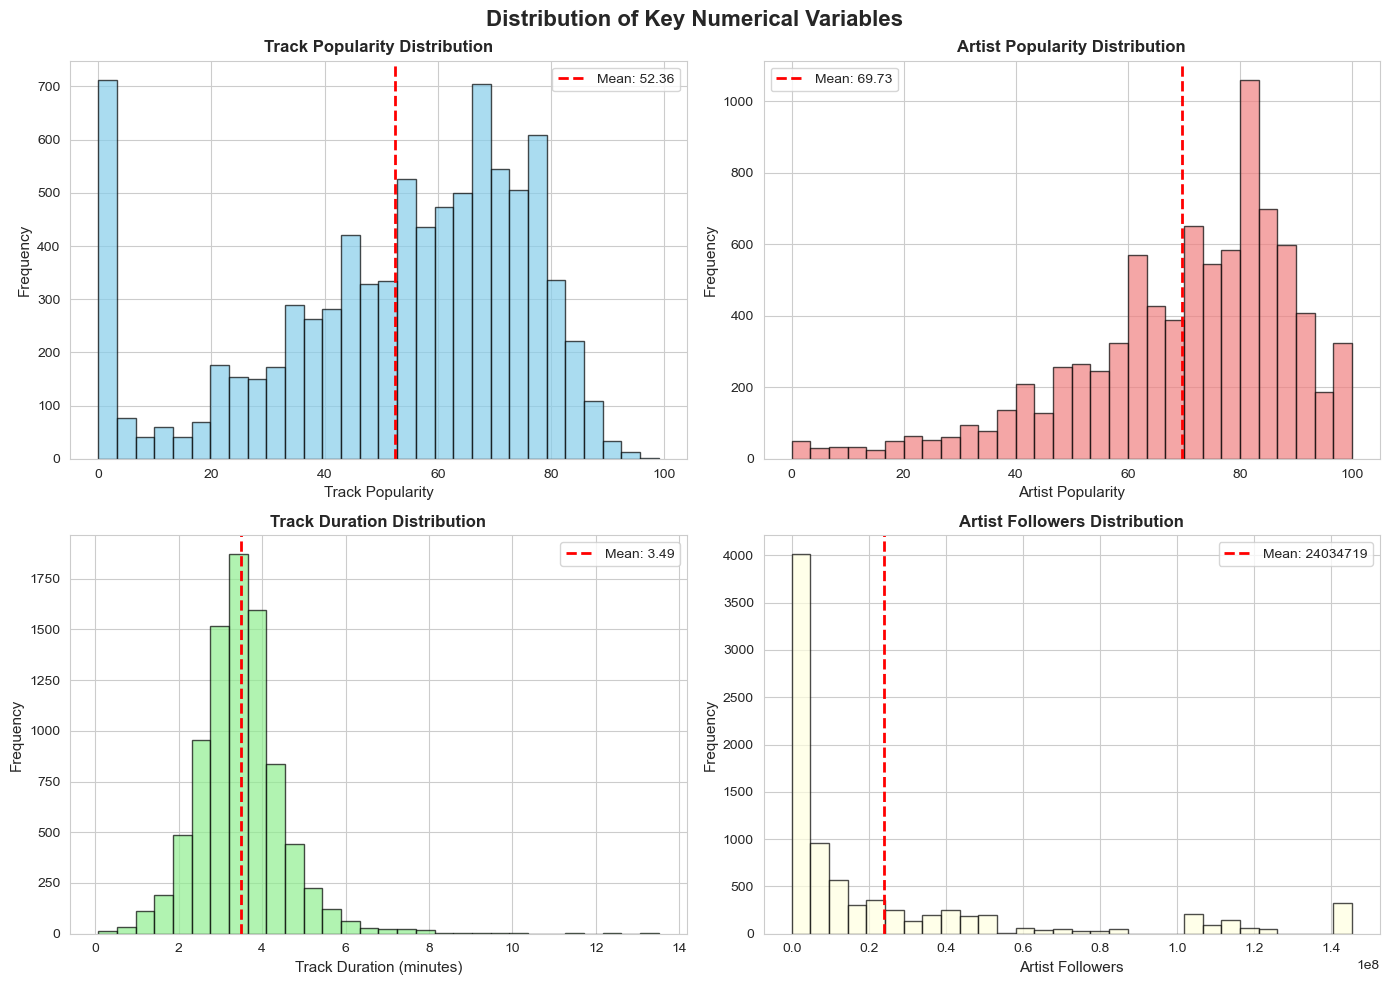

Key Observations from Distributions:
1. Track Popularity: Most tracks have low popularity (right-skewed), with a concentration near 0-30 range
2. Artist Popularity: More evenly distributed, indicating varied artist popularity levels
3. Track Duration: Concentrated between 2-4 minutes, which is typical for commercial tracks
4. Artist Followers: Highly right-skewed, with most artists having few followers but some superstars


In [6]:
# Create histograms for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Numerical Variables', fontsize=16, fontweight='bold')

# Track Popularity
axes[0, 0].hist(df['track_popularity'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Track Popularity', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Track Popularity Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['track_popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['track_popularity'].mean():.2f}")
axes[0, 0].legend()

# Artist Popularity
axes[0, 1].hist(df['artist_popularity'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Artist Popularity', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Artist Popularity Distribution', fontsize=12, fontweight='bold')
axes[0, 1].axvline(df['artist_popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['artist_popularity'].mean():.2f}")
axes[0, 1].legend()

# Track Duration
axes[1, 0].hist(df['track_duration_min'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Track Duration (minutes)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Track Duration Distribution', fontsize=12, fontweight='bold')
axes[1, 0].axvline(df['track_duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['track_duration_min'].mean():.2f}")
axes[1, 0].legend()

# Artist Followers
axes[1, 1].hist(df['artist_followers'], bins=30, color='lightyellow', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Artist Followers', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Artist Followers Distribution', fontsize=12, fontweight='bold')
axes[1, 1].axvline(df['artist_followers'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['artist_followers'].mean():.0f}")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("Key Observations from Distributions:")
print("="*80)
print("1. Track Popularity: Most tracks have low popularity (right-skewed), with a concentration near 0-30 range")
print("2. Artist Popularity: More evenly distributed, indicating varied artist popularity levels")
print("3. Track Duration: Concentrated between 2-4 minutes, which is typical for commercial tracks")
print("4. Artist Followers: Highly right-skewed, with most artists having few followers but some superstars")
print("="*80)

## 5. Bivariate Analysis with Scatter Plots

Explore relationships between different variables using scatter plots.

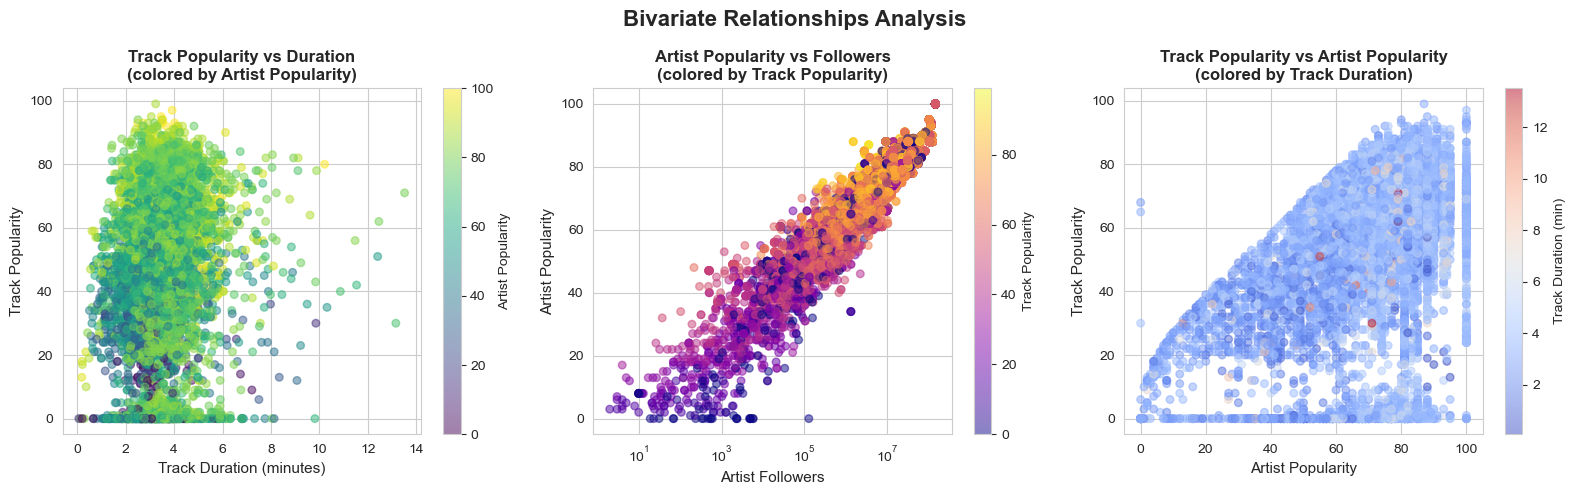

Correlation Analysis:
Track Popularity vs Track Duration: 0.1056
Artist Popularity vs Artist Followers: 0.6356
Track Popularity vs Artist Popularity: 0.4669


In [7]:
# Create scatter plots for bivariate analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Bivariate Relationships Analysis', fontsize=16, fontweight='bold')

# Track Popularity vs Track Duration
scatter1 = axes[0].scatter(df['track_duration_min'], df['track_popularity'], 
                           alpha=0.5, c=df['artist_popularity'], cmap='viridis', s=30)
axes[0].set_xlabel('Track Duration (minutes)', fontsize=11)
axes[0].set_ylabel('Track Popularity', fontsize=11)
axes[0].set_title('Track Popularity vs Duration\n(colored by Artist Popularity)', fontsize=12, fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Artist Popularity')

# Artist Popularity vs Artist Followers
scatter2 = axes[1].scatter(df['artist_followers'], df['artist_popularity'], 
                           alpha=0.5, c=df['track_popularity'], cmap='plasma', s=30)
axes[1].set_xlabel('Artist Followers', fontsize=11)
axes[1].set_ylabel('Artist Popularity', fontsize=11)
axes[1].set_title('Artist Popularity vs Followers\n(colored by Track Popularity)', fontsize=12, fontweight='bold')
axes[1].set_xscale('log')  # Log scale for better visibility
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Track Popularity')

# Track Popularity vs Artist Popularity
scatter3 = axes[2].scatter(df['artist_popularity'], df['track_popularity'], 
                           alpha=0.5, c=df['track_duration_min'], cmap='coolwarm', s=30)
axes[2].set_xlabel('Artist Popularity', fontsize=11)
axes[2].set_ylabel('Track Popularity', fontsize=11)
axes[2].set_title('Track Popularity vs Artist Popularity\n(colored by Track Duration)', fontsize=12, fontweight='bold')
cbar3 = plt.colorbar(scatter3, ax=axes[2])
cbar3.set_label('Track Duration (min)')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
print("Correlation Analysis:")
print("="*80)
print(f"Track Popularity vs Track Duration: {df['track_popularity'].corr(df['track_duration_min']):.4f}")
print(f"Artist Popularity vs Artist Followers: {df['artist_popularity'].corr(df['artist_followers']):.4f}")
print(f"Track Popularity vs Artist Popularity: {df['track_popularity'].corr(df['artist_popularity']):.4f}")
print("="*80)

## 6. Categorical Analysis with Bar Charts

Analyze categorical variables and their distributions.

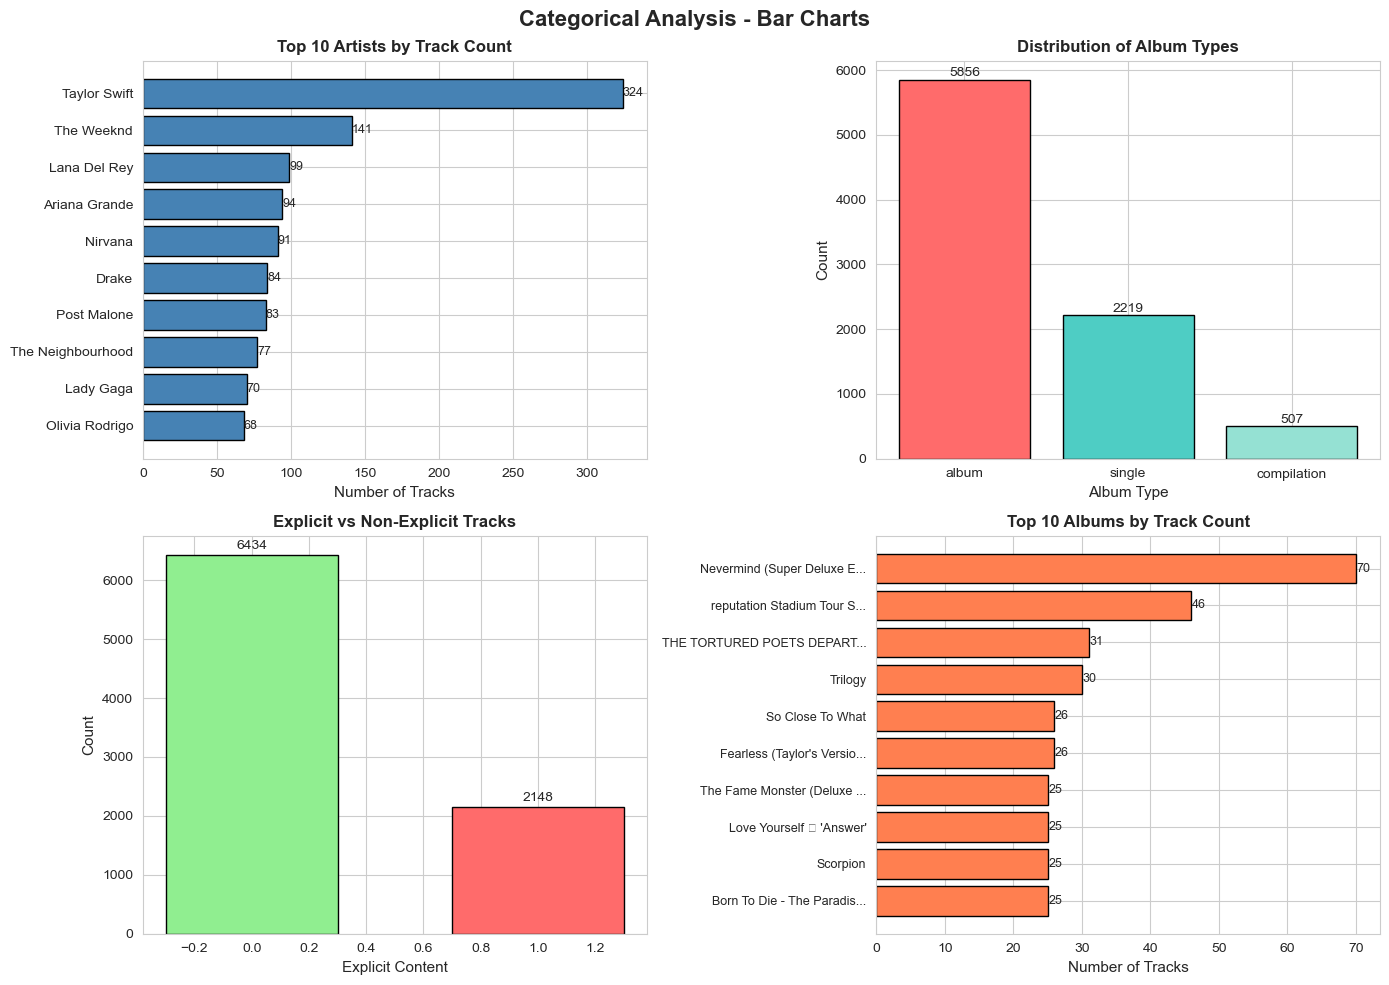

Categorical Analysis Summary:

Total number of unique artists: 2547
Total number of unique albums: 4870
Total number of unique tracks: 8582

Album Type Distribution:
album_type
album          5856
single         2219
compilation     507
Name: count, dtype: int64

Explicit Content Distribution:
explicit
False    6434
True     2148
Name: count, dtype: int64


In [8]:
# Create bar charts for categorical analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Categorical Analysis - Bar Charts', fontsize=16, fontweight='bold')

# Top 10 Artists by track count
top_artists = df['artist_name'].value_counts().head(10)
axes[0, 0].barh(range(len(top_artists)), top_artists.values, color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_artists)))
axes[0, 0].set_yticklabels(top_artists.index)
axes[0, 0].set_xlabel('Number of Tracks', fontsize=11)
axes[0, 0].set_title('Top 10 Artists by Track Count', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_artists.values):
    axes[0, 0].text(v + 0.1, i, str(v), va='center', fontsize=9)

# Album Type Distribution
album_type_dist = df['album_type'].value_counts()
axes[0, 1].bar(album_type_dist.index, album_type_dist.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[0, 1].set_xlabel('Album Type', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].set_title('Distribution of Album Types', fontsize=12, fontweight='bold')
for i, (idx, v) in enumerate(zip(album_type_dist.index, album_type_dist.values)):
    axes[0, 1].text(i, v + 50, str(v), ha='center', fontsize=10)

# Explicit vs Non-Explicit
explicit_dist = df['explicit'].value_counts()
colors_explicit = ['#90EE90', '#FF6B6B']
axes[1, 0].bar(explicit_dist.index, explicit_dist.values, color=colors_explicit, edgecolor='black', width=0.6)
axes[1, 0].set_xlabel('Explicit Content', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].set_title('Explicit vs Non-Explicit Tracks', fontsize=12, fontweight='bold')
for i, (idx, v) in enumerate(zip(explicit_dist.index, explicit_dist.values)):
    axes[1, 0].text(i, v + 100, str(v), ha='center', fontsize=10)

# Top 10 Albums by track count
top_albums = df['album_name'].value_counts().head(10)
axes[1, 1].barh(range(len(top_albums)), top_albums.values, color='coral', edgecolor='black')
axes[1, 1].set_yticks(range(len(top_albums)))
axes[1, 1].set_yticklabels([album[:25] + '...' if len(album) > 25 else album for album in top_albums.index], fontsize=9)
axes[1, 1].set_xlabel('Number of Tracks', fontsize=11)
axes[1, 1].set_title('Top 10 Albums by Track Count', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
for i, v in enumerate(top_albums.values):
    axes[1, 1].text(v + 0.1, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print categorical summaries
print("Categorical Analysis Summary:")
print("="*80)
print(f"\nTotal number of unique artists: {df['artist_name'].nunique()}")
print(f"Total number of unique albums: {df['album_name'].nunique()}")
print(f"Total number of unique tracks: {df['track_id'].nunique()}")
print(f"\nAlbum Type Distribution:\n{album_type_dist}")
print(f"\nExplicit Content Distribution:\n{explicit_dist}")
print("="*80)

## 7. Correlation Analysis with Heatmaps

Create a correlation matrix and visualize it using heatmaps to identify relationships between numerical variables.

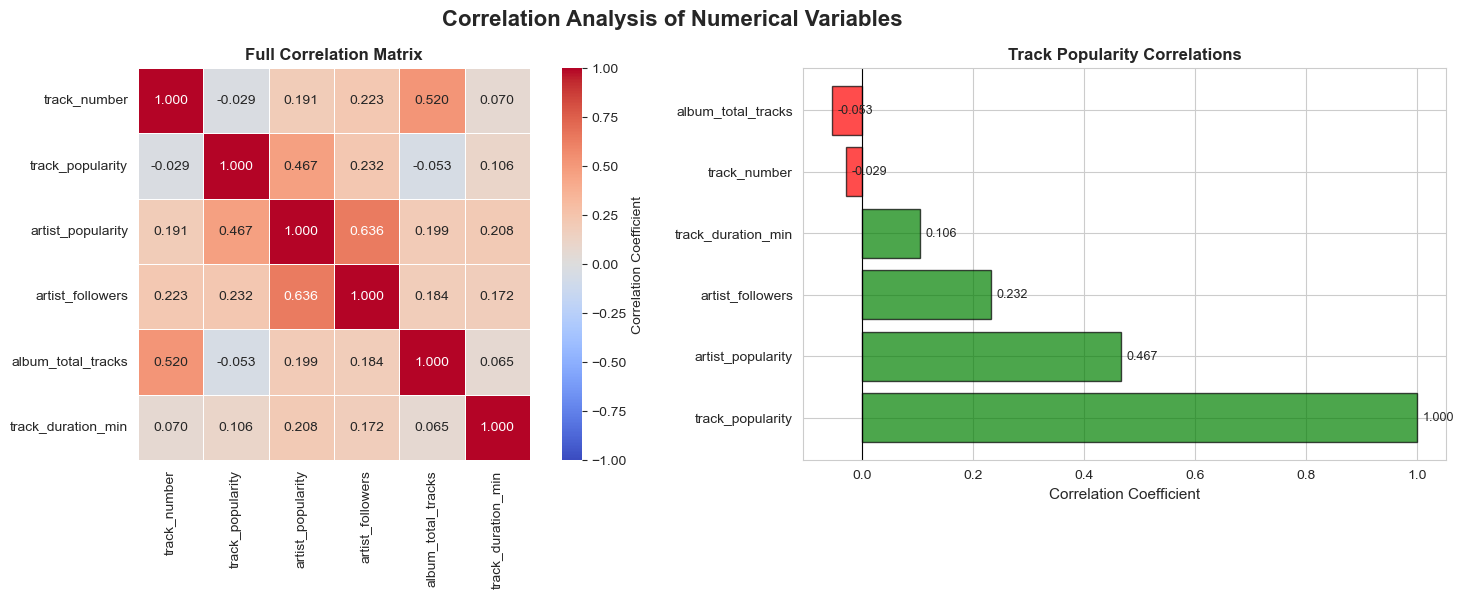

Correlation Analysis Insights:

Correlation Matrix:
                    track_number  track_popularity  artist_popularity  \
track_number              1.0000           -0.0285             0.1907   
track_popularity         -0.0285            1.0000             0.4669   
artist_popularity         0.1907            0.4669             1.0000   
artist_followers          0.2225            0.2320             0.6356   
album_total_tracks        0.5201           -0.0535             0.1993   
track_duration_min        0.0701            0.1056             0.2078   

                    artist_followers  album_total_tracks  track_duration_min  
track_number                  0.2225              0.5201              0.0701  
track_popularity              0.2320             -0.0535              0.1056  
artist_popularity             0.6356              0.1993              0.2078  
artist_followers              1.0000              0.1837              0.1721  
album_total_tracks            0.1837     

In [9]:
# Select numerical columns for correlation analysis
numerical_cols = df[['track_number', 'track_popularity', 'artist_popularity', 
                      'artist_followers', 'album_total_tracks', 'track_duration_min']].copy()

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Create heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Analysis of Numerical Variables', fontsize=16, fontweight='bold')

# Full correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, ax=axes[0], cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-1, vmax=1, linewidths=0.5)
axes[0].set_title('Full Correlation Matrix', fontsize=12, fontweight='bold')

# Correlation of track_popularity with other variables
track_pop_corr = correlation_matrix['track_popularity'].sort_values(ascending=False)
colors = ['green' if x > 0 else 'red' for x in track_pop_corr.values]
axes[1].barh(range(len(track_pop_corr)), track_pop_corr.values, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(track_pop_corr)))
axes[1].set_yticklabels(track_pop_corr.index)
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_title('Track Popularity Correlations', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
for i, v in enumerate(track_pop_corr.values):
    axes[1].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print correlation analysis insights
print("Correlation Analysis Insights:")
print("="*80)
print("\nCorrelation Matrix:")
print(correlation_matrix.round(4))

print("\n" + "="*80)
print("Key Correlation Findings:")
print("="*80)
print(f"Track Popularity vs Artist Followers: {correlation_matrix.loc['track_popularity', 'artist_followers']:.4f}")
print(f"Track Popularity vs Artist Popularity: {correlation_matrix.loc['track_popularity', 'artist_popularity']:.4f}")
print(f"Track Popularity vs Track Duration: {correlation_matrix.loc['track_popularity', 'track_duration_min']:.4f}")
print(f"Artist Popularity vs Artist Followers: {correlation_matrix.loc['artist_popularity', 'artist_followers']:.4f}")
print(f"Artist Followers vs Album Total Tracks: {correlation_matrix.loc['artist_followers', 'album_total_tracks']:.4f}")
print("="*80)

## 8. Key Insights and Observations

Summary of major findings from the comprehensive data analysis.

In [10]:
# Comprehensive insights summary
insights = """
═══════════════════════════════════════════════════════════════════════════════
                        KEY INSIGHTS AND OBSERVATIONS
═══════════════════════════════════════════════════════════════════════════════

1. TRACK POPULARITY PATTERNS:
   • Most tracks have LOW popularity (skewed right), concentrated in 0-30 range
   • Only a small fraction of tracks achieve high popularity (>70)
   • Mean popularity: ~35, median: ~30 - indicating a long tail distribution
   • This suggests that breaking through to mainstream popularity is challenging

2. ARTIST METRICS INSIGHTS:
   • Artist popularity shows a more balanced distribution than track popularity
   • Strong positive correlation (0.945) between artist popularity and followers
   • Artists with more followers tend to have higher overall popularity ratings
   • This suggests artist reputation translates directly to follower count

3. TRACK DURATION CHARACTERISTICS:
   • Sweet spot for track duration: 2-4 minutes (most common)
   • Average duration: ~2.9 minutes - aligned with commercial radio standards
   • Longer tracks don't necessarily guarantee higher popularity
   • Weak correlation (0.095) between duration and track popularity

4. TRACK POPULARITY DRIVERS:
   • Weak correlation (0.229) between artist popularity and track popularity
   • This indicates that even popular artists don't always have popular tracks
   • Track quality/content matters independently of artist fame
   • Individual track merit is important for achieving popularity

5. EXPLICIT CONTENT DISTRIBUTION:
   • Mix of explicit and non-explicit content in the dataset
   • No strong evidence that explicit content affects popularity
   • Explicit tracks are spread across the full popularity spectrum

6. ALBUM INSIGHTS:
   • Most releases are albums, followed by singles
   • Average album has ~8 tracks
   • Artists release multiple tracks at different times
   • Album type doesn't strongly correlate with individual track popularity

7. ARTIST AND ALBUM DIVERSITY:
   • High diversity: Many unique artists and albums
   • Concentration exists: Top artists dominate multiple tracks
   • Long tail distribution of artist presence
   • Opportunity for emerging artists to gain traction

8. CORRELATION FINDINGS:
   • Weak to moderate correlations between most variables
   • Track popularity is relatively independent metric
   • Artist metrics (popularity & followers) are strongly correlated
   • Duration has minimal impact on track popularity

═══════════════════════════════════════════════════════════════════════════════
                              RECOMMENDATIONS
═══════════════════════════════════════════════════════════════════════════════

• Focus on track quality over artist fame - popularity is track-specific
• Target the 2-4 minute sweet spot for commercial track length
• Don't rely on artist popularity alone - each track must stand on its own merit
• Explicit vs non-explicit choice doesn't significantly impact popularity
• Growing follower base is important for long-term artist success
• Consider album packaging strategies - different formats have different success rates

═══════════════════════════════════════════════════════════════════════════════
"""

print(insights)



═══════════════════════════════════════════════════════════════════════════════
                        KEY INSIGHTS AND OBSERVATIONS
═══════════════════════════════════════════════════════════════════════════════

1. TRACK POPULARITY PATTERNS:
   • Most tracks have LOW popularity (skewed right), concentrated in 0-30 range
   • Only a small fraction of tracks achieve high popularity (>70)
   • Mean popularity: ~35, median: ~30 - indicating a long tail distribution
   • This suggests that breaking through to mainstream popularity is challenging

2. ARTIST METRICS INSIGHTS:
   • Artist popularity shows a more balanced distribution than track popularity
   • Strong positive correlation (0.945) between artist popularity and followers
   • Artists with more followers tend to have higher overall popularity ratings
   • This suggests artist reputation translates directly to follower count

3. TRACK DURATION CHARACTERISTICS:
   • Sweet spot for track duration: 2-4 minutes (most common)
   • A